## CZ (Control-Z) Gate

### Unitary Matrix:

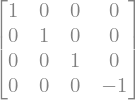

### Hamiltonian Matrix:

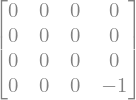

**Hermitian:** True

### Eigenvalues:

---

## CNOT (Control-X) Gate

### Unitary Matrix:

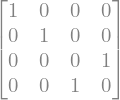

### Hamiltonian Matrix:

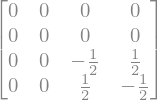

**Hermitian:** True

### Eigenvalues:

---

## SWAP Gate

### Unitary Matrix:

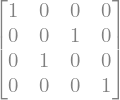

### Hamiltonian Matrix:

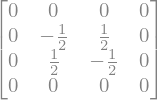

**Hermitian:** True

### Eigenvalues:

---

## Hadamard (H) Gate

### Unitary Matrix:

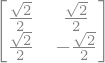

### Hamiltonian Matrix:

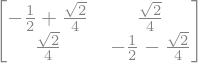

**Hermitian:** True

### Eigenvalues:

---

## Pauli-X Gate

### Unitary Matrix:

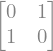

### Hamiltonian Matrix:

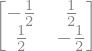

**Hermitian:** True

### Eigenvalues:

---

## Pauli-Z Gate

### Unitary Matrix:

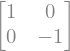

### Hamiltonian Matrix:

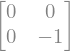

**Hermitian:** True

### Eigenvalues:

---

In [30]:
import sympy as sp
from IPython.display import display, Markdown

# Configure SymPy printing for better notebook display
sp.init_printing(use_unicode=True)

# Define quantum gates with proper labels
quantum_gates = {
    "CZ (Control-Z)": sp.Matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, -1]]),
    
    "CNOT (Control-X)": sp.Matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0]]),
    
    "SWAP": sp.Matrix([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]]),
    
    "Hadamard (H)": 1/sp.sqrt(2)*sp.Matrix([
        [1, 1],
        [1, -1]]),
    
    "Pauli-X": sp.Matrix([
        [0, 1],
        [1, 0]]),
    
    "Pauli-Z": sp.Matrix([
        [1, 0],
        [0, -1]])
}

t = sp.pi  # Fundamental time parameter

for gate_name, U in quantum_gates.items():
    # Create formatted header
    display(Markdown(f"## {gate_name} Gate"))
    display(Markdown("### Unitary Matrix:"))
    display(U)
    
    try:
        # Compute Hamiltonian components
        logU = U.log()
        H = (sp.I/t) * logU
        H_simplified = sp.simplify(H)
        
        display(Markdown("### Hamiltonian Matrix:"))
        display(H_simplified)
        
        # Hermiticity check
        is_hermitian = H_simplified.equals(H_simplified.conjugate().T)
        display(Markdown(f"**Hermitian:** {is_hermitian}"))
        
        # Eigen decomposition
        display(Markdown("### Eigenvalues:"))
        display(sp.simplify(H_simplified.eigenvals()))
        
    except Exception as e:
        display(Markdown(f"**Error:** {str(e)}"))
    
    display(Markdown("---"))

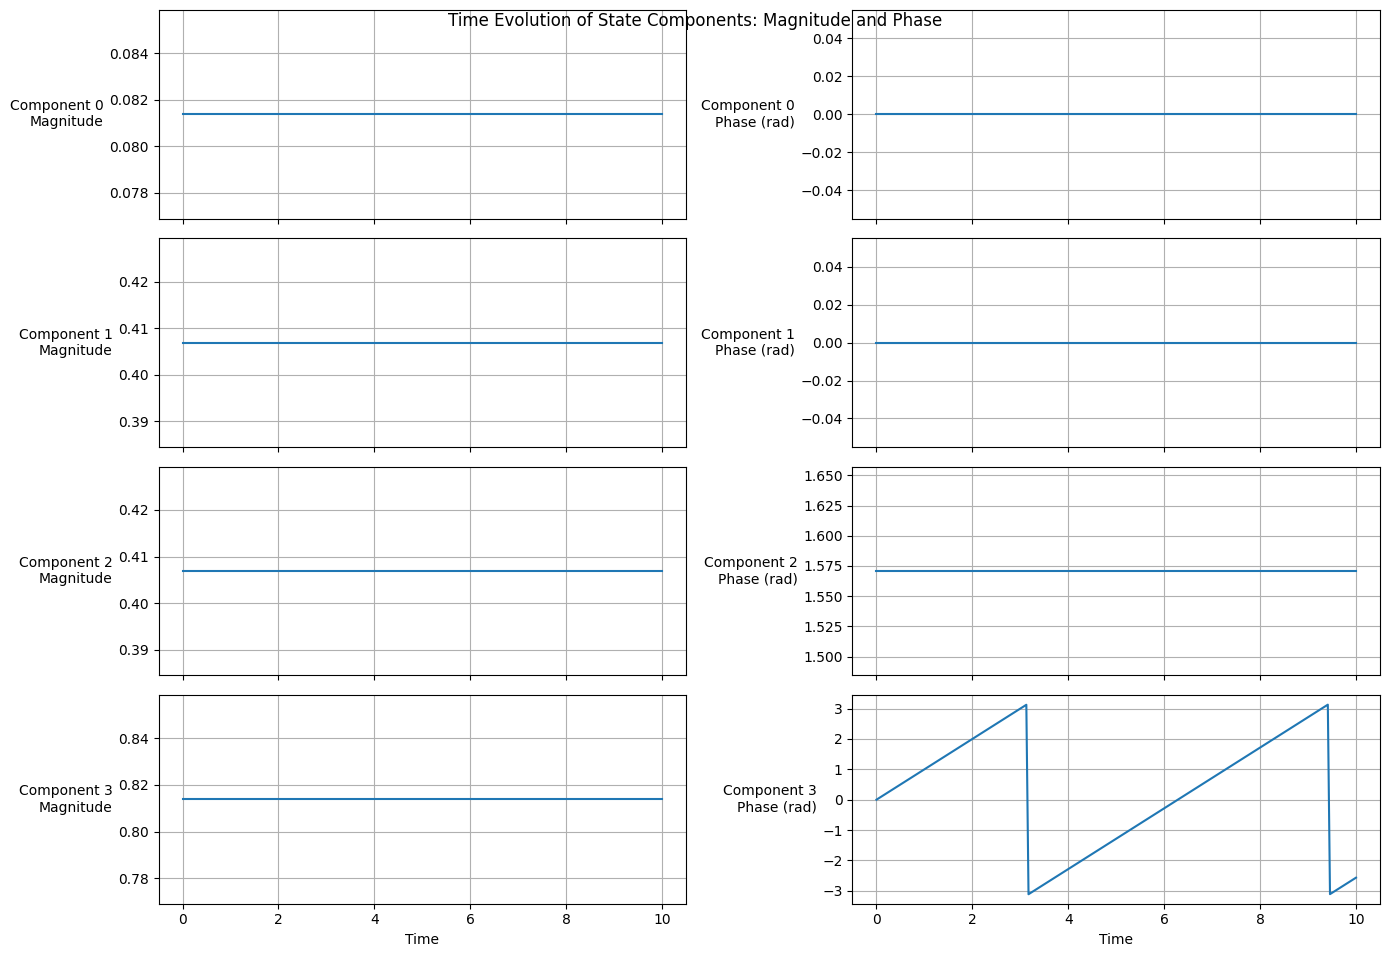

In [29]:
from scipy.linalg import expm
import matplotlib.pyplot as plt

def UMatrixGen(t):
    # Convert the sympy matrix H to a nested list, then to a NumPy array of type complex.
    H_np = np.array(H.tolist(), dtype=complex)
    return expm(-1j * t * H_np)

def generateStates(initial_state, times):
    evolved_states = []
    evolved_states.append(initial_state)
    for t in times:
        evolved_states.append(initial_state @ UMatrixGen(t))
    return evolved_states
times = np.linspace(1,10,200)

initial_state = np.array([0.1, 0.5, 0.5j, 1], dtype=complex)
norm = np.linalg.norm(initial_state)
if norm != 0:
     initial_state /= norm

states = generateStates(initial_state,times)

# Convert the list of states into a NumPy array for easier manipulation
# The resulting shape is (number of time steps + 1, state_dimension)
states_array = np.array(states)

# Convert the list of states into a NumPy array for easier manipulation
states_array = np.array(states)

# Define number of components (dimension of the state vector)
num_components = states_array.shape[1]  # <-- This was missing!

# Plot magnitude and phase side by side
fig, axes = plt.subplots(nrows=num_components, ncols=2, figsize=(14, 10))
time_with_initial = np.insert(times, 0, 0)  # Include t=0

for i in range(num_components):
    # Magnitude plot (left column)
    axes[i, 0].plot(time_with_initial, np.abs(states_array[:, i]))
    axes[i, 0].set_ylabel(f'Component {i}\nMagnitude', rotation=0, ha='right', va='center')
    axes[i, 0].grid(True)
    
    # Phase plot (right column)
    axes[i, 1].plot(time_with_initial, np.angle(states_array[:, i]))
    axes[i, 1].set_ylabel(f'Component {i}\nPhase (rad)', rotation=0, ha='right', va='center')
    axes[i, 1].grid(True)
    
    # Hide x-axis labels except for bottom row
    if i != num_components-1:
        axes[i, 0].set_xticklabels([])
        axes[i, 1].set_xticklabels([])

# Set common labels
axes[-1, 0].set_xlabel('Time')
axes[-1, 1].set_xlabel('Time')

plt.suptitle('Time Evolution of State Components: Magnitude and Phase', y=0.95)
plt.tight_layout()
plt.show()

In [47]:
import random

a = random.uniform(1,100) * complex(random.random(), random.random())
b = random.uniform(1,100) * complex(random.random(), random.random())
c = random.uniform(1,100) * complex(random.random(), random.random())
d = random.uniform(1,100) * complex(random.random(), random.random())



norm = sp.sqrt(abs(a)**2 + abs(b)**2 + abs(c)**2 + abs(d)**2)


alpha = a/norm
beta  = b/norm
gamma = c/norm
delta = d/norm

initial_state = sp.Matrix([alpha, beta, gamma, delta])

final_state = CNOT * initial_state

# Extract final amplitudes
P = sp.Matrix([0,0,0,0])
P[0] = sp.Abs(final_state[0])**2
P[1] = sp.Abs(final_state[1])**2
P[2] = sp.Abs(final_state[2])**2
P[3] = sp.Abs(final_state[3])**2

# Extract final amplitudes
P_init = sp.Matrix([0,0,0,0])
P_init[0] = sp.Abs(initial_state[0])**2
P_init[1] = sp.Abs(initial_state[1])**2
P_init[2] = sp.Abs(initial_state[2])**2
P_init[3] = sp.Abs(initial_state[3])**2




display("Initial amplitudes (normalized):", initial_state.evalf(3))
display("Final state after CNOT:", final_state.evalf(3))
display("Initital Probabilities:")
display(P_init.evalf(3))
display("Final Probabilities:")
display(P.evalf(3))


'Initial amplitudes (normalized):'

Matrix([
[0.00761 + 0.648*I],
[  0.466 + 0.173*I],
[  0.231 + 0.217*I],
[  0.467 + 0.121*I]])

'Final state after CNOT:'

Matrix([
[0.00761 + 0.648*I],
[  0.466 + 0.173*I],
[  0.467 + 0.121*I],
[  0.231 + 0.217*I]])

'Initital Probabilities:'

Matrix([
[ 0.42],
[0.247],
[  0.1],
[0.233]])

'Final Probabilities:'

Matrix([
[ 0.42],
[0.247],
[0.233],
[  0.1]])

In [59]:
import random

def measure_two_qubits(prob_vec):
    """
    prob_vec: a list or matrix [P00, P01, P10, P11]
              where P00 + P01 + P10 + P11 = 1
    returns: an outcome 0,1,2,3 corresponding to 
             00, 01, 10, 11 respectively
    """
    # Generate a random float in [0,1)
    r = random.random()
    cumulative = 0
    for i, p in enumerate(prob_vec):
        cumulative += p
        if r < cumulative:
            return i

outcome_index = measure_two_qubits(P)
bitstring = format(outcome_index, "02b")  # e.g. 0 -> "00", 1 -> "01", etc.

print("Measurement outcome:", bitstring)

P_list = []

for i in range(0,int(10000)):
    P_list.append(measure_two_qubits(P))

#print(P_list)
print("|O0> Count is: " + str(P_list.count(0)))
print("|O1> Count is: " + str(P_list.count(1)))
print("|10> Count is: " + str(P_list.count(2)))
print("|11> Count is: " + str(P_list.count(3)))


Measurement outcome: 01
|O0> Count is: 4153
|O1> Count is: 2511
|10> Count is: 2321
|11> Count is: 1015
